In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [131]:
train_data=pd.read_csv('/content/Train_aBjfeNk.csv')

In [132]:
train_data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [133]:
test_data=pd.read_csv('/content/Test_LqhgPWU.csv')

In [134]:
test_data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [135]:
test_data['Segmentation']=-1

In [136]:
test_data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,-1
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,-1
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,-1
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,-1
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,-1


In [137]:
df=pd.concat([train_data,test_data],axis='index')

In [138]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [139]:
df.tail()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,-1
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,-1
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6,-1
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,-1
2626,467968,Female,No,43,Yes,Healthcare,9.0,Low,3.0,Cat_7,-1


In [140]:
df.shape

(10695, 11)

In [141]:
df=df.reset_index(drop=True)

In [236]:
##EDA

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10695 entries, 0 to 10694
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
 9   Var_1            10587 non-null  object 
 10  Segmentation     10695 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 919.2+ KB


In [16]:
df['Segmentation'].value_counts()

-1    2627
D     2268
A     1972
C     1970
B     1858
Name: Segmentation, dtype: int64

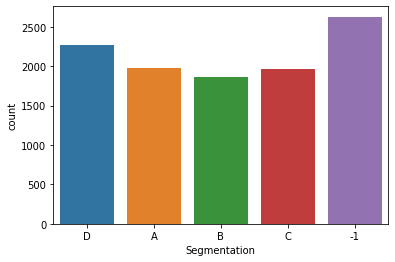

In [17]:
sns.countplot(df['Segmentation'])

In [18]:
df.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

Text(0.5, 1.0, 'Female')

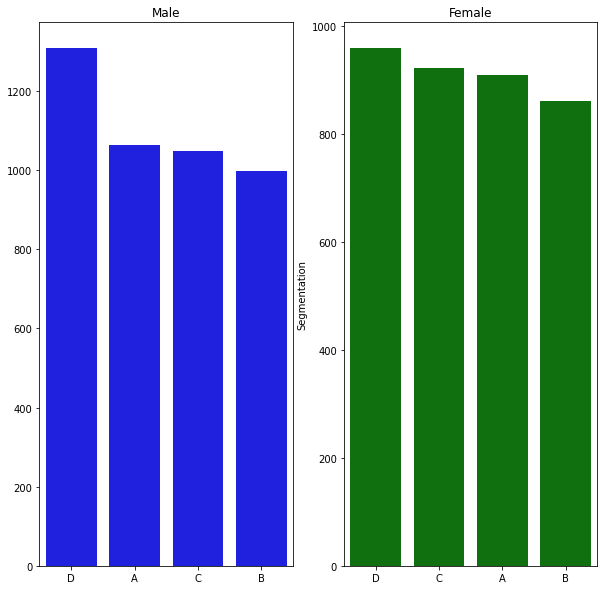

In [19]:
f, axes = plt.subplots(1, 2, figsize=(10, 10))


segments_male = train_data.loc[train_data.Gender == 'Male',"Segmentation"].value_counts()
sns.barplot(segments_male.index , segments_male.values,  color="b",ax=axes[0]).set_title('Male')



segments_female = train_data.loc[train_data.Gender == 'Female',"Segmentation"].value_counts()
sns.barplot(segments_female.index , segments_female,   color="g",ax=axes[1]).set_title('Female')

In [20]:
df['Gender'].isna().sum()

0

In [21]:
df['Ever_Married'].value_counts()

Yes    6163
No     4342
Name: Ever_Married, dtype: int64

Text(0.5, 1.0, 'Unmarried Segmentation')

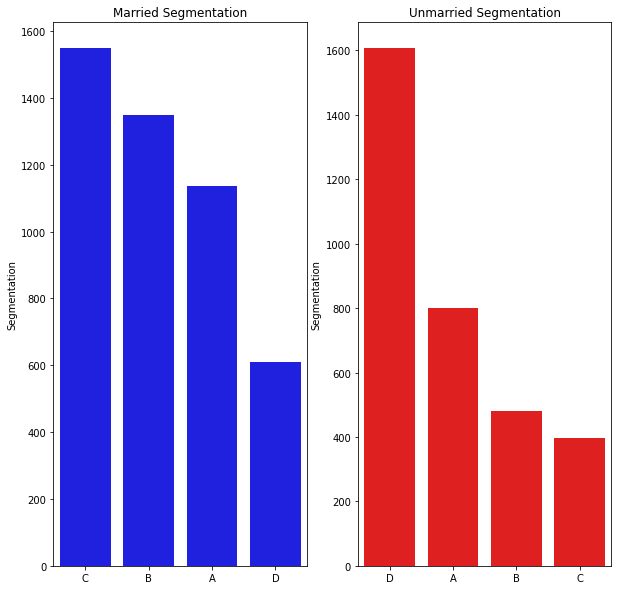

In [22]:
f,axes=plt.subplots(1,2,figsize=(10,10))
seg_Yes=train_data.loc[df.Ever_Married == 'Yes',"Segmentation"].value_counts()
sns.barplot(seg_Yes.index,seg_Yes,color='b',ax=axes[0]).set_title('Married Segmentation')


seg_No=train_data.loc[df.Ever_Married == 'No',"Segmentation"].value_counts()
sns.barplot(seg_No.index,seg_No,color='r').set_title('Unmarried Segmentation')

In [23]:
df['Ever_Married'].fillna('No',inplace=True)

In [24]:
df['Ever_Married'].isna().sum()

0

Text(0.5, 1.0, 'Segment : D')

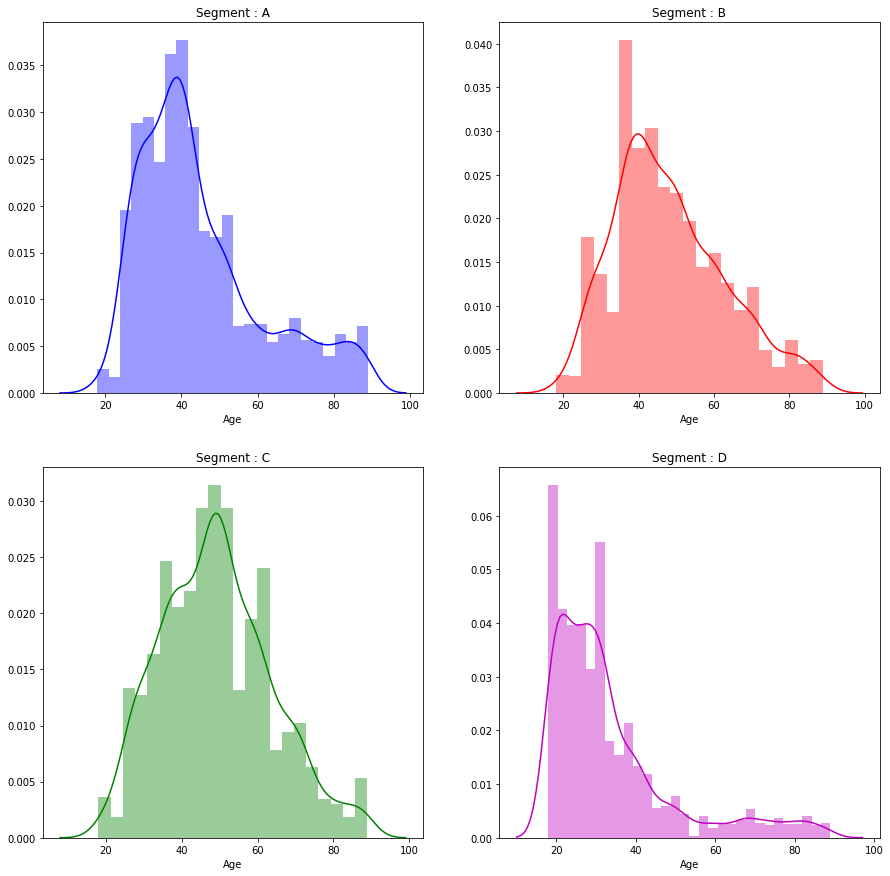

In [25]:
f, axes = plt.subplots(2, 2, figsize=(15, 15))

sns.distplot(train_data[train_data.Segmentation =='A']["Age"],  color="b", ax=axes[0, 0]).set_title('Segment : A')

sns.distplot(train_data[train_data.Segmentation =='B']["Age"],   color="r", ax=axes[0, 1]).set_title('Segment : B')

sns.distplot(train_data[train_data.Segmentation =='C']["Age"],  color="g", ax=axes[1, 0]).set_title('Segment : C')

sns.distplot(train_data[train_data.Segmentation =='D']["Age"], color="m", ax=axes[1, 1]).set_title('Segment : D')

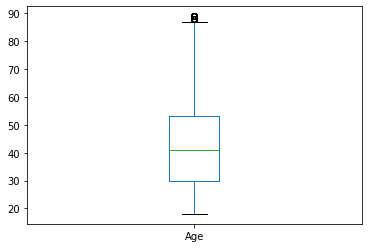

In [26]:
(df['Age']).plot(kind='box')

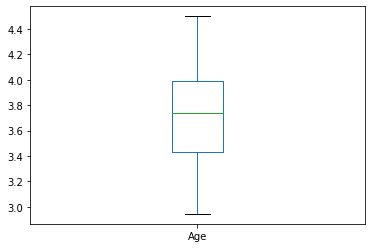

In [27]:
#Removing outliers 
df['Age']=np.log1p(df['Age'])
df['Age'].plot(kind='box')

In [28]:
train_data.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [29]:
df['Graduated'].value_counts()

Yes    6570
No     4023
Name: Graduated, dtype: int64

Text(0.5, 1.0, 'Graduated Segmentation')

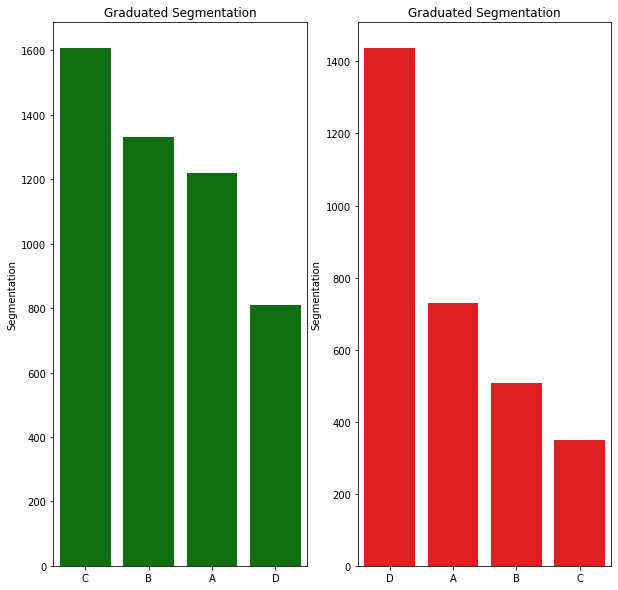

In [30]:
f,axes=plt.subplots(1,2,figsize=(10,10))

seg_grad=train_data[train_data['Graduated']=='Yes']['Segmentation'].value_counts()
sns.barplot(seg_grad.index,seg_grad,color='g',ax=axes[0]).set_title('Graduated Segmentation')

seg_nongrad=train_data[train_data['Graduated']=='No']['Segmentation'].value_counts()
sns.barplot(seg_nongrad.index,seg_nongrad,color='r',ax=axes[1]).set_title('Graduated Segmentation')

In [31]:
df['Graduated'].isna().sum()

102

In [32]:
df['Graduated'].fillna('No',inplace=True)

In [33]:
train_data[train_data['Segmentation']=='A']['Profession'].value_counts()


Artist           558
Entertainment    365
Engineer         259
Doctor           199
Lawyer           197
Executive        125
Healthcare       106
Homemaker         73
Marketing         57
Name: Profession, dtype: int64

In [34]:
df['Profession'].value_counts()

Artist           3318
Healthcare       1750
Entertainment    1250
Engineer          935
Doctor            930
Lawyer            844
Executive         775
Marketing         403
Homemaker         328
Name: Profession, dtype: int64

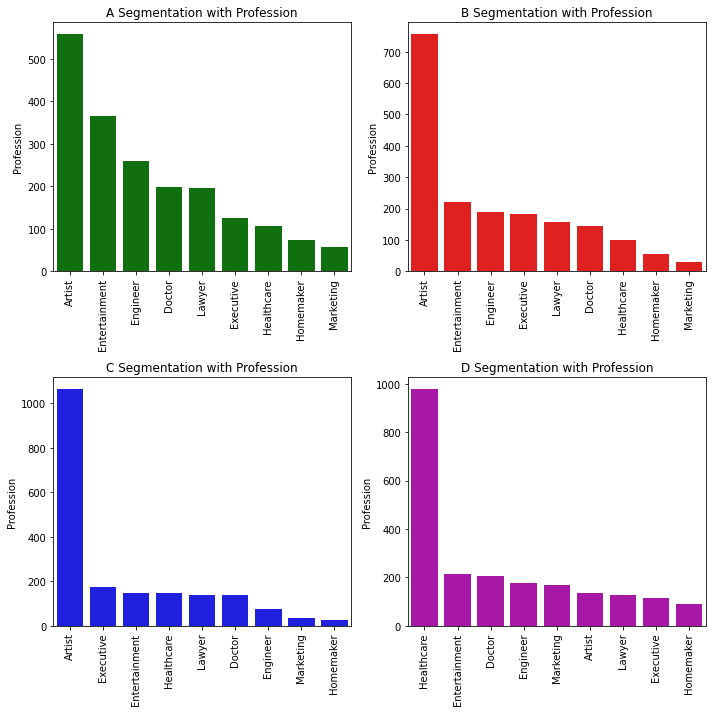

In [35]:
f,axes=plt.subplots(2,2,figsize=(10,10))

seg_Apro=train_data[train_data['Segmentation']=='A']['Profession'].value_counts()
sns.barplot(seg_Apro.index,seg_Apro,color='g',ax=axes[0,0]).set_title('A Segmentation with Profession')



seg_Bpro=train_data[train_data['Segmentation']=='B']['Profession'].value_counts()
sns.barplot(seg_Bpro.index,seg_Bpro,color='r',ax=axes[0,1]).set_title('B Segmentation with Profession')



seg_Cpro=train_data[train_data['Segmentation']=='C']['Profession'].value_counts()
sns.barplot(seg_Cpro.index,seg_Cpro,color='b',ax=axes[1,0]).set_title('C Segmentation with Profession')



seg_Dpro=train_data[train_data['Segmentation']=='D']['Profession'].value_counts()
sns.barplot(seg_Dpro.index,seg_Dpro,color='m',ax=axes[1,1]).set_title('D Segmentation with Profession')

for ax in f.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)
plt.tight_layout()

In [143]:
df['Profession'].isna().sum()

162

In [144]:
df['Profession'].fillna('Unemployed',inplace=True)

In [38]:
df.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [39]:
train_data['Work_Experience'].value_counts()

1.0     2354
0.0     2318
9.0      474
8.0      463
2.0      286
3.0      255
4.0      253
6.0      204
7.0      196
5.0      194
10.0      53
11.0      50
12.0      48
13.0      46
14.0      45
Name: Work_Experience, dtype: int64

Text(0.5, 1.0, 'Segment : D')

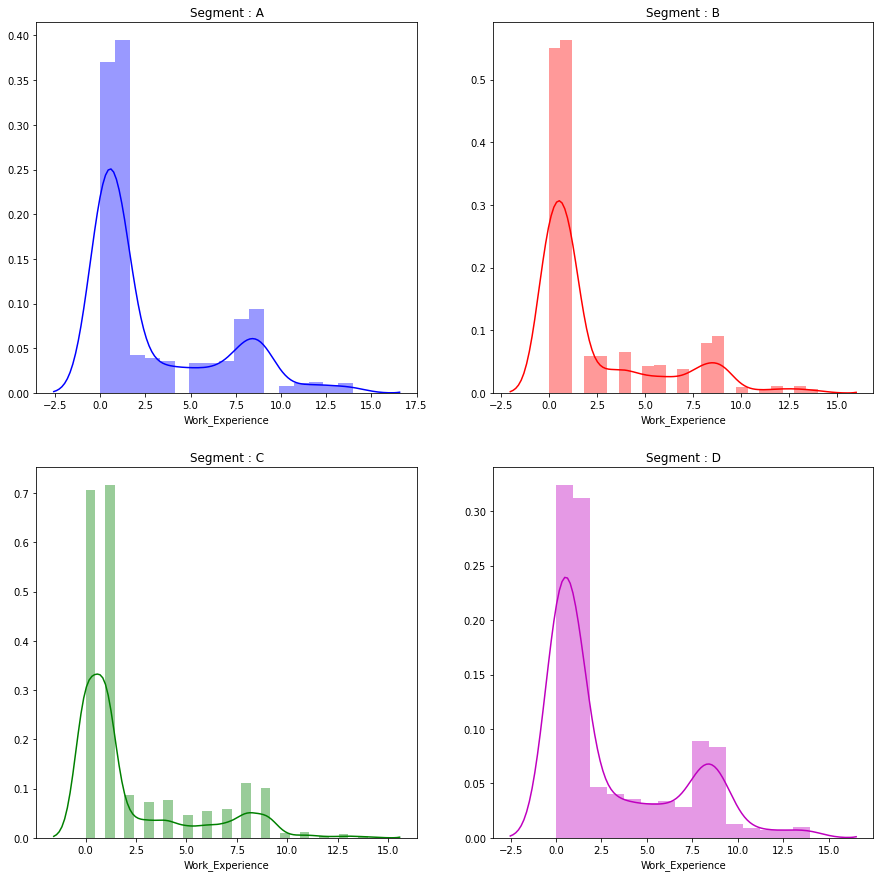

In [40]:
f, axes = plt.subplots(2, 2, figsize=(15, 15))

sns.distplot(train_data[train_data.Segmentation =='A']["Work_Experience"],  color="b", ax=axes[0, 0]).set_title('Segment : A')

sns.distplot(train_data[train_data.Segmentation =='B']["Work_Experience"],   color="r", ax=axes[0, 1]).set_title('Segment : B')

sns.distplot(train_data[train_data.Segmentation =='C']["Work_Experience"],  color="g", ax=axes[1, 0]).set_title('Segment : C')

sns.distplot(train_data[train_data.Segmentation =='D']["Work_Experience"], color="m", ax=axes[1, 1]).set_title('Segment : D')

In [41]:
df['Work_Experience'].isna().sum()

1098

In [42]:
df.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [43]:
df['Spending_Score'].value_counts()

Low        6494
Average    2599
High       1602
Name: Spending_Score, dtype: int64

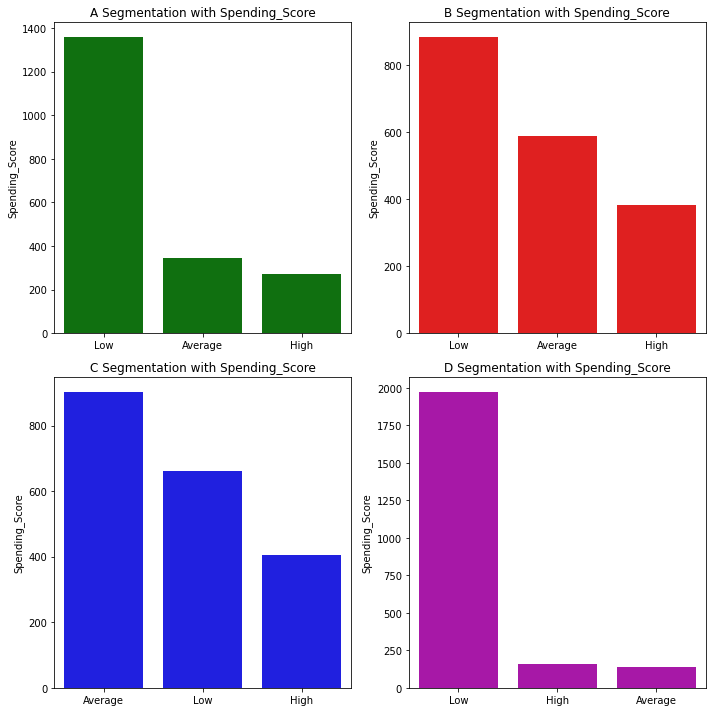

In [44]:
f,axes=plt.subplots(2,2,figsize=(10,10))

seg_Apro=train_data[train_data['Segmentation']=='A']['Spending_Score'].value_counts()
sns.barplot(seg_Apro.index,seg_Apro,color='g',ax=axes[0,0]).set_title('A Segmentation with Spending_Score')



seg_Bpro=train_data[train_data['Segmentation']=='B']['Spending_Score'].value_counts()
sns.barplot(seg_Bpro.index,seg_Bpro,color='r',ax=axes[0,1]).set_title('B Segmentation with Spending_Score')



seg_Cpro=train_data[train_data['Segmentation']=='C']['Spending_Score'].value_counts()
sns.barplot(seg_Cpro.index,seg_Cpro,color='b',ax=axes[1,0]).set_title('C Segmentation with Spending_Score')



seg_Dpro=train_data[train_data['Segmentation']=='D']['Spending_Score'].value_counts()
sns.barplot(seg_Dpro.index,seg_Dpro,color='m',ax=axes[1,1]).set_title('D Segmentation with Spending_Score')

# for ax in f.axes:
    # plt.sca(ax)
    # plt.xticks(rotation=90)
plt.tight_layout()

In [45]:
df.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [46]:
df['Family_Size'].value_counts()

2.0    3158
1.0    1965
3.0    1952
4.0    1823
5.0     812
6.0     290
7.0     122
8.0      65
9.0      60
Name: Family_Size, dtype: int64

Text(0.5, 1.0, 'Segment : D')

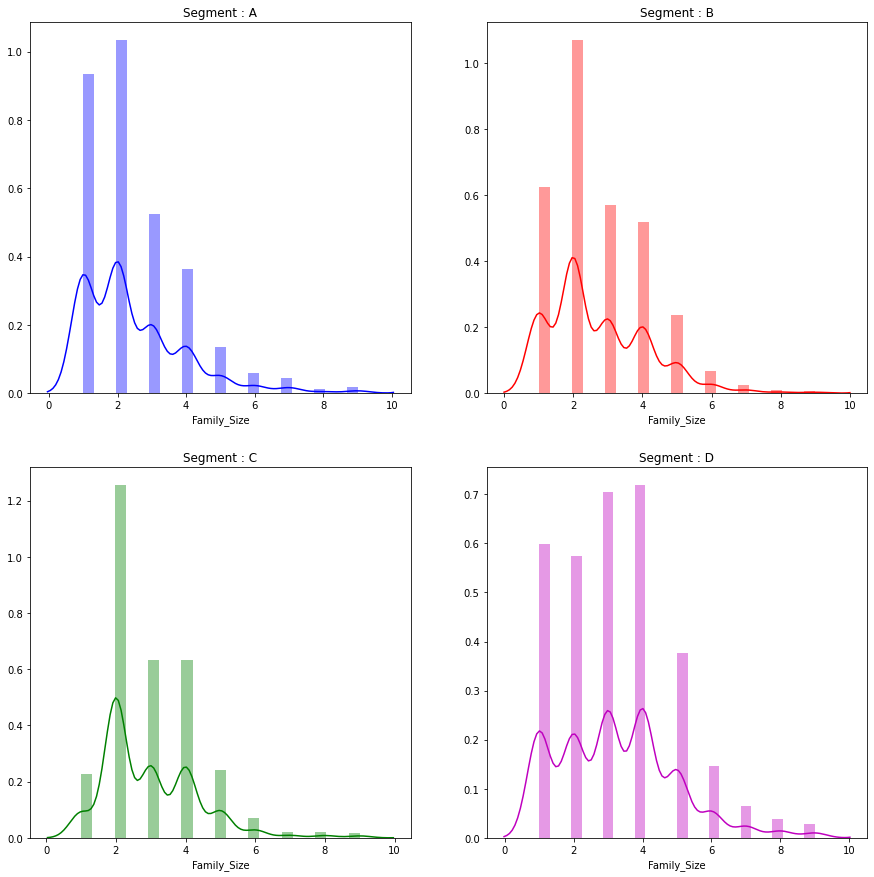

In [47]:
f, axes = plt.subplots(2, 2, figsize=(15, 15))

sns.distplot(train_data[train_data.Segmentation =='A']["Family_Size"],  color="b", ax=axes[0, 0]).set_title('Segment : A')

sns.distplot(train_data[train_data.Segmentation =='B']["Family_Size"],   color="r", ax=axes[0, 1]).set_title('Segment : B')

sns.distplot(train_data[train_data.Segmentation =='C']["Family_Size"],  color="g", ax=axes[1, 0]).set_title('Segment : C')

sns.distplot(train_data[train_data.Segmentation =='D']["Family_Size"], color="m", ax=axes[1, 1]).set_title('Segment : D')

In [48]:
df.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [49]:
df['Var_1'].value_counts()

Cat_6    6910
Cat_4    1475
Cat_3    1089
Cat_2     563
Cat_7     269
Cat_1     167
Cat_5     114
Name: Var_1, dtype: int64

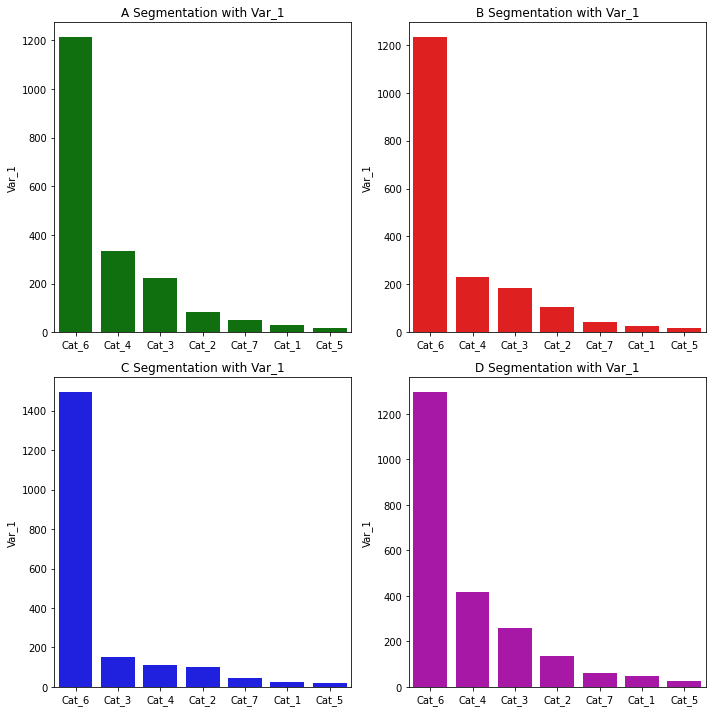

In [50]:
f,axes=plt.subplots(2,2,figsize=(10,10))

seg_Apro=train_data[train_data['Segmentation']=='A']['Var_1'].value_counts()
sns.barplot(seg_Apro.index,seg_Apro,color='g',ax=axes[0,0]).set_title('A Segmentation with Var_1')



seg_Bpro=train_data[train_data['Segmentation']=='B']['Var_1'].value_counts()
sns.barplot(seg_Bpro.index,seg_Bpro,color='r',ax=axes[0,1]).set_title('B Segmentation with Var_1')



seg_Cpro=train_data[train_data['Segmentation']=='C']['Var_1'].value_counts()
sns.barplot(seg_Cpro.index,seg_Cpro,color='b',ax=axes[1,0]).set_title('C Segmentation with Var_1')



seg_Dpro=train_data[train_data['Segmentation']=='D']['Var_1'].value_counts()
sns.barplot(seg_Dpro.index,seg_Dpro,color='m',ax=axes[1,1]).set_title('D Segmentation with Var_1')

# for ax in f.axes:
    # plt.sca(ax)
    # plt.xticks(rotation=90)
plt.tight_layout()

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10695 entries, 0 to 10694
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10695 non-null  object 
 3   Age              10695 non-null  float64
 4   Graduated        10695 non-null  object 
 5   Profession       10695 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
 9   Var_1            10587 non-null  object 
 10  Segmentation     10695 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 919.2+ KB


In [145]:
max(df['Age'])

89

In [146]:
def get_age_groups(x):
    if x <= 25:
        return '0-25'
    if x > 25 and x<=35:
        return '25-35'
    if x>35 and x<=45:
        return '35-45'
    if x>45 and x<=55:
        return '45-55'
    if x>55 and x<=65:
        return '55-65'
    else:
        return '65-100'

In [147]:
gender = {'Male':0,'Female':1}
Ever_Married = {'No':1,'Yes':2,'unk':0}
graduate = {'No':1,'Yes':2,'unk':0}
spend_score ={'Low':0,'Average':1,'High':2}
cat_var = {'unk':0,'Cat_1': 1,'Cat_2': 2,'Cat_3': 3,'Cat_4': 4,'Cat_5': 5,'Cat_6': 6,'Cat_7': 7}
seg ={'A':0,'B':1,'C':2,'D':3}
agegroup={'35-45': 3,
 '25-35': 2,
 '45-55': 4,
 '65-100': 6,
 '0-25': 1,
 '55-65': 5}

In [148]:
df['Age_groups']=df['Age'].apply(lambda x: get_age_groups(x))

In [149]:
df['Gender']=df['Gender'].map(gender)

In [150]:
df.isna().sum()

ID                    0
Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession            0
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation          0
Age_groups            0
dtype: int64

In [151]:
df['Ever_Married'].fillna('unk',inplace=True)

In [152]:
df['Graduated'].fillna('unk',inplace=True)

In [153]:
df['Var_1'].fillna('unk',inplace=True)

In [154]:
df.isna().sum()

ID                    0
Gender                0
Ever_Married          0
Age                   0
Graduated             0
Profession            0
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1                 0
Segmentation          0
Age_groups            0
dtype: int64

In [155]:
# df['Gender'] = df['Gender'].map(gender)
df['Ever_Married'] = df['Ever_Married'].map(Ever_Married)
df['Graduated'] = df['Graduated'].map(graduate)
df['Spending_Score'] = df['Spending_Score'].map(spend_score)
df['Var_1'] = df['Var_1'].map(cat_var)
# df['Segmentation'] = df['Segmentation'].map(seg).astype('int')

In [63]:
# df['Age_groups']=df['Age_groups'].map(agegroup)

In [156]:
df['Segmentation'].replace({'D':3, 'A':0, 'B':1, 'C':2},inplace=True)

In [157]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Age_groups
0,462809,0,1,22,1,Healthcare,1.0,0,4.0,4,3,0-25
1,462643,1,2,38,2,Engineer,NaN,1,3.0,4,0,35-45
2,466315,1,2,67,2,Engineer,1.0,0,1.0,6,1,65-100
3,461735,0,2,67,2,Lawyer,0.0,2,2.0,6,1,65-100
4,462669,1,2,40,2,Entertainment,NaN,2,6.0,6,0,35-45


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10695 entries, 0 to 10694
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  int64  
 2   Ever_Married     10695 non-null  int64  
 3   Age              10695 non-null  int64  
 4   Graduated        10695 non-null  int64  
 5   Profession       10695 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  int64  
 8   Family_Size      10247 non-null  float64
 9   Var_1            10695 non-null  int64  
 10  Segmentation     10695 non-null  int64  
 11  Age_groups       10695 non-null  object 
dtypes: float64(2), int64(8), object(2)
memory usage: 1002.8+ KB


In [159]:
cat_col=df.select_dtypes(exclude=np.number)

In [160]:
df.corr()

,ID,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
ID,1.000000,-0.005364,0.016564,-0.009562,-0.018097,-0.029351,0.003949,0.014095,0.002495,0.000312
Gender,-0.005364,1.000000,-0.115230,-0.025208,0.040831,0.062572,-0.059056,-0.059704,-0.035167,-0.018790
Ever_Married,0.016564,-0.115230,1.000000,0.523141,0.186325,-0.095089,0.536152,-0.076579,0.092429,-0.118932
Age,-0.009562,-0.025208,0.523141,1.000000,0.218446,-0.189653,0.421978,-0.281725,0.158736,-0.144215
Graduated,-0.018097,0.040831,0.186325,0.218446,1.000000,0.029279,0.094379,-0.231215,0.134263,-0.092622
Work_Experience,-0.029351,0.062572,-0.095089,-0.189653,0.029279,1.000000,-0.075595,-0.065163,0.018134,0.015989
Spending_Score,0.003949,-0.059056,0.536152,0.421978,0.094379,-0.075595,1.000000,0.090380,0.078453,-0.057589
Family_Size,0.014095,-0.059704,-0.076579,-0.281725,-0.231215,-0.065163,0.090380,1.000000,-0.147534,0.118428
Var_1,0.002495,-0.035167,0.092429,0.158736,0.134263,0.018134,0.078453,-0.147534,1.000000,-0.005396
Segmentation,0.000312,-0.018790,-0.118932,-0.144215,-0.092622,0.015989,-0.057589,0.118428,-0.005396,1.000000


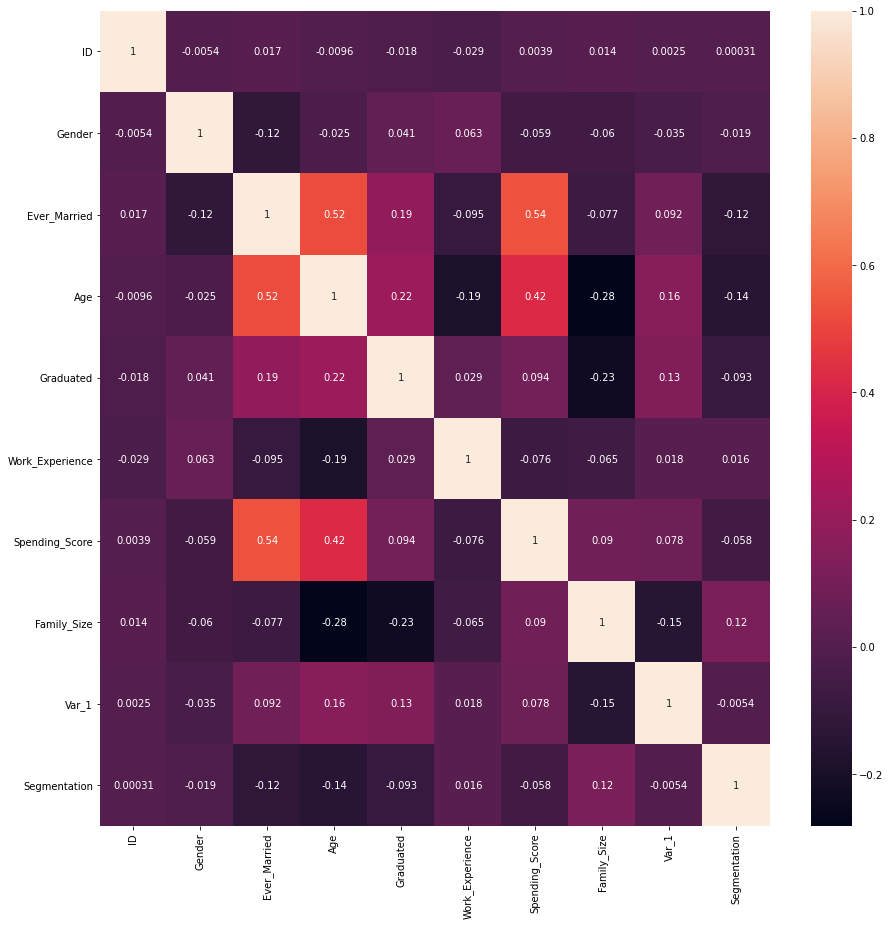

In [161]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

In [162]:
cat_col

,Profession,Age_groups
0,Healthcare,0-25
1,Engineer,35-45
2,Engineer,65-100
3,Lawyer,65-100
4,Entertainment,35-45
...,...,...
10690,Healthcare,25-35
10691,Doctor,25-35
10692,Entertainment,45-55
10693,Executive,45-55


In [163]:
df=pd.concat([df,pd.get_dummies(cat_col)],axis='columns')

In [164]:
df.isna().sum()

ID                             0
Gender                         0
Ever_Married                   0
Age                            0
Graduated                      0
Profession                     0
Work_Experience             1098
Spending_Score                 0
Family_Size                  448
Var_1                          0
Segmentation                   0
Age_groups                     0
Profession_Artist              0
Profession_Doctor              0
Profession_Engineer            0
Profession_Entertainment       0
Profession_Executive           0
Profession_Healthcare          0
Profession_Homemaker           0
Profession_Lawyer              0
Profession_Marketing           0
Profession_Unemployed          0
Age_groups_0-25                0
Age_groups_25-35               0
Age_groups_35-45               0
Age_groups_45-55               0
Age_groups_55-65               0
Age_groups_65-100              0
dtype: int64

In [73]:
df.shape

(10695, 22)

In [165]:
df.drop(columns={'Profession'},inplace=True)

In [75]:
# df['Family_Size'].fillna(-999,inplace=True)

In [166]:
df['Family_Size'].fillna(df['Family_Size'].median(),inplace=True)

In [167]:
df['Work_Experience'].fillna(df['Work_Experience'].median(),inplace=True)

In [168]:
df.isna().sum()

ID                          0
Gender                      0
Ever_Married                0
Age                         0
Graduated                   0
Work_Experience             0
Spending_Score              0
Family_Size                 0
Var_1                       0
Segmentation                0
Age_groups                  0
Profession_Artist           0
Profession_Doctor           0
Profession_Engineer         0
Profession_Entertainment    0
Profession_Executive        0
Profession_Healthcare       0
Profession_Homemaker        0
Profession_Lawyer           0
Profession_Marketing        0
Profession_Unemployed       0
Age_groups_0-25             0
Age_groups_25-35            0
Age_groups_35-45            0
Age_groups_45-55            0
Age_groups_55-65            0
Age_groups_65-100           0
dtype: int64

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10695 entries, 0 to 10694
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        10695 non-null  int64  
 1   Gender                    10695 non-null  int64  
 2   Ever_Married              10695 non-null  int64  
 3   Age                       10695 non-null  int64  
 4   Graduated                 10695 non-null  int64  
 5   Work_Experience           10695 non-null  float64
 6   Spending_Score            10695 non-null  int64  
 7   Family_Size               10695 non-null  float64
 8   Var_1                     10695 non-null  int64  
 9   Segmentation              10695 non-null  int64  
 10  Age_groups                10695 non-null  object 
 11  Profession_Artist         10695 non-null  uint8  
 12  Profession_Doctor         10695 non-null  uint8  
 13  Profession_Engineer       10695 non-null  uint8  
 14  Profes

In [170]:
df.drop(columns={'Age'},inplace=True)

In [182]:
df.drop(columns={'Age_groups'},inplace=True)

In [183]:
test_df=df[df['Segmentation']==-1]

In [184]:
test_df=test_df.reset_index(drop=True)

In [185]:
test_df.drop(columns={'Segmentation'},inplace=True)

In [186]:
train_df=df[df['Segmentation']!=-1]

In [187]:
train_df.drop(columns={'ID'},inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [188]:
X=train_df.drop(columns={'Segmentation'})

In [189]:
y=train_df['Segmentation']

In [190]:
X.head()

,Gender,Ever_Married,Graduated,Work_Experience,Spending_Score,Family_Size,Var_1,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Profession_Unemployed,Age_groups_0-25,Age_groups_25-35,Age_groups_35-45,Age_groups_45-55,Age_groups_55-65,Age_groups_65-100
0,0,1,1,1.0,0,4.0,4,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,1,2,2,1.0,1,3.0,4,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1,2,2,1.0,0,1.0,6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,2,2,0.0,2,2.0,6,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,1,2,2,1.0,2,6.0,6,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [191]:
from sklearn.preprocessing import RobustScaler

In [192]:
scaler=RobustScaler()

In [193]:
scaler.fit(X)

RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True)

In [194]:
X_std=scaler.fit_transform(X)

In [196]:
from sklearn.model_selection import train_test_split

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.25, random_state=99)

In [198]:
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier


In [199]:
rfc=RandomForestClassifier(n_estimators=5000,max_depth=24,min_samples_leaf=10)

In [200]:
lg=LGBMClassifier(n_estimators=1000)

In [201]:
xgb=XGBClassifier(max_depth=3,subsample=.8,colsample_bytree=.6,n_estimators=50)

In [202]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)

In [203]:
train_pred=xgb.predict(X_train)

In [204]:
test_pred=xgb.predict(X_test)

In [205]:
xgb.score(X_train,y_train)

0.5485043794414146

In [206]:
xgb.score(X_test,y_test)

0.5166088249876054

In [207]:
from sklearn.metrics import confusion_matrix, classification_report

In [208]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       0.46      0.51      0.48      1498
           1       0.46      0.29      0.35      1343
           2       0.56      0.62      0.59      1483
           3       0.66      0.72      0.69      1727

    accuracy                           0.55      6051
   macro avg       0.53      0.54      0.53      6051
weighted avg       0.54      0.55      0.54      6051



In [209]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.43      0.50      0.46       474
           1       0.40      0.22      0.28       515
           2       0.54      0.64      0.59       487
           3       0.63      0.70      0.67       541

    accuracy                           0.52      2017
   macro avg       0.50      0.52      0.50      2017
weighted avg       0.50      0.52      0.50      2017



In [210]:
#Taking segmentation from train data for common IDS in test data


In [211]:
common_id=np.intersect1d(train_data.ID,test_data.ID)


In [212]:
test_df.head()

,ID,Gender,Ever_Married,Graduated,Work_Experience,Spending_Score,Family_Size,Var_1,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Profession_Unemployed,Age_groups_0-25,Age_groups_25-35,Age_groups_35-45,Age_groups_45-55,Age_groups_55-65,Age_groups_65-100
0,458989,1,2,2,0.0,0,1.0,6,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,458994,0,2,2,8.0,1,4.0,6,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,458996,1,2,1,0.0,0,1.0,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,459000,0,2,1,11.0,2,2.0,6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,459001,1,1,1,1.0,0,4.0,6,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0


In [213]:
test_dff=scaler.transform(test_df.drop(columns={'ID'}))

In [214]:
test_dff

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0., -1., ...,  0.,  0.,  1.],
       ...,
       [ 1., -1.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 1., -1.,  0., ...,  0.,  0.,  0.]])

In [215]:
final_pred=xgb.predict(test_dff)

In [216]:
final_pred

array([0, 2, 0, ..., 0, 1, 3])

In [217]:
len(final_pred)

2627

In [218]:
test_data.shape

(2627, 11)

In [219]:

submission=test_data[['ID']]
submission['Segmentation']=final_pred

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [220]:
submission.set_index('ID',inplace=True)


In [221]:
test_data.shape

(2627, 11)

In [223]:
np.array(train_data.set_index('ID').loc[common_id,'Segmentation'])

array(['B', 'C', 'A', ..., 'D', 'A', 'B'], dtype=object)

In [224]:
submission.loc[common_id,'Segmentation']=np.array(train_data.set_index('ID').loc[common_id,'Segmentation'])

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [225]:
submission.reset_index(inplace=True)

In [227]:
submission['Segmentation'].value_counts()

D    642
A    593
C    556
B    541
3     90
2     80
0     78
1     47
Name: Segmentation, dtype: int64

In [228]:
submission['Segmentation'].replace({3:'D', 0:'A', 1:'B', 2:'C'},inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [229]:
submission['Segmentation'].value_counts()

D    732
A    671
C    636
B    588
Name: Segmentation, dtype: int64

In [230]:
submission.to_csv('xgbclassifier.csv',index=False)

In [231]:
importance=xgb.feature_importances_

In [232]:
imp_df=pd.DataFrame(importance,index=X.columns,columns={'Importance'})

In [233]:
imp_df.sort_values('Importance',ascending=False)

,Importance
Profession_Healthcare,0.207599
Profession_Artist,0.106329
Ever_Married,0.096144
Age_groups_0-25,0.080734
Spending_Score,0.070242
Graduated,0.066898
Age_groups_25-35,0.053135
Profession_Marketing,0.034416
Family_Size,0.032782
Profession_Entertainment,0.029866


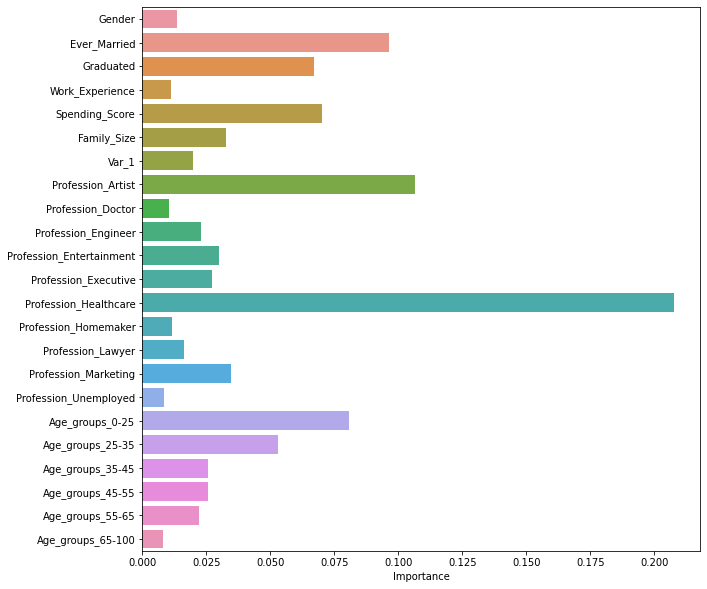

In [235]:
plt.figure(figsize=(10,10))
sns.barplot(x=imp_df['Importance'],y=X.columns)